# Portfolio Allocation Optimization

"Don't place all your eggs in one basket" - investors usually invest in a set of stocks to reduce the risk of relying on a single volatile stock.

This project aims to efficiently allocate a portfolio of stocks using Markowitz Portfolio Optimization Model so as to achieve a satisfactory level of return and volatility according to Sharpe Ratio.

The following 15 stocks were selected from different sectors and industries for diversification.

<table>
    <tr>
        <th>Security</th>
        <th>Ticker Symbol</th>
        <th>Sector</th> 
        <th>Industry</th>
    </tr>
    <tr>
        <td>Abbott Laboratories</td>
        <td>ABT</td>
        <td>Health Care</td>
        <td>Health Care Equipment</td>
    </tr>
    <tr>
        <td>Johnson & Johnson</td>
        <td>JNJ</td>
        <td>Health Care</td>
        <td>Pharmaceuticals</td>
    </tr>
    <tr>
        <td>BlackRock, Inc.</td>
        <td>BLK</td>
        <td>Financials</td>
        <td>Asset Management & Custody Banks</td>
    </tr>
    <tr>
        <td>The Charles Schwab Corporation</td>
        <td>SCHW</td>
        <td>Financials</td>
        <td>Investment Banking & Brokerage</td>
    </tr>
    <tr>
        <td>Visa Inc.</td>
        <td>V</td>
        <td>Information Technology</td>
        <td>Data Processing & Outsourced Services</td>
    </tr>
    <tr>
        <td>Apple Inc.</td>
        <td>AAPL</td>
        <td>Information Technology</td>
        <td>Technology Hardware, Storage & Peripherals</td>
    </tr>
    <tr>
        <td>Intel Corporation</td>
        <td>INTC</td>
        <td>Information Technology</td>
        <td>Semiconductors</td>
    </tr>
    <tr>
        <td>Microsoft Corporation</td>
        <td>MSFT</td>
        <td>Information Technology</td>
        <td>Systems Software</td>
    </tr>
    <tr>
        <td>Alphabet Inc.</td>
        <td>GOOG</td>
        <td>Communication Services</td>
        <td>Interactive Media & Services</td>
    </tr>
    <tr>
        <td>Charter Communications, Inc.</td>
        <td>CHTR</td>
        <td>Communication Services</td>
        <td>Cable & Satellite</td>
    </tr>
    <tr>
        <td>Costco Wholesale Corporation</td>
        <td>COST</td>
        <td>Consumer Staple</td>
        <td>Hypermarkets & Super Centers</td>
    </tr>
    <tr>
        <td>PepsiCo, Inc.</td>
        <td>PEP</td>
        <td>Consumer Staple</td>
        <td>Soft Drinks</td>
    </tr>
    <tr>
        <td>American Tower Corporation (REIT)</td>
        <td>AMT</td>
        <td>Real Estate</td>
        <td>Specialized REITs</td>
    </tr>
    <tr>
        <td>Union Pacific Corporation</td>
        <td>UNP</td>
        <td>Industrials</td>
        <td>Railroads</td>
    </tr>
    <tr>
        <td>Honeywell International Inc.</td>
        <td>HON</td>
        <td>Industrials</td>
        <td>Industrial Conglomerates</td>
    </tr>
</table>


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# retrieving data
start = pd.to_datetime('2016-01-01')
end = pd.to_datetime('2021-01-01')

abt_stock = quandl.get('WIKI/ABT.11', start_date = start, end_date = end)
jnj_stock = quandl.get('WIKI/JNJ.11', start_date = start, end_date = end)
blk_stock = quandl.get('WIKI/BLK.11', start_date = start, end_date = end)
schw_stock = quandl.get('WIKI/SCHW.11', start_date = start, end_date = end)
v_stock = quandl.get('WIKI/V.11', start_date = start, end_date = end)
aapl_stock = quandl.get('WIKI/AAPL.11', start_date = start, end_date = end)
intc_stock = quandl.get('WIKI/INTC.11', start_date = start, end_date = end)
msft_stock = quandl.get('WIKI/MSFT.11', start_date = start, end_date = end)
goog_stock = quandl.get('WIKI/GOOG.11', start_date = start, end_date = end)
chtr_stock = quandl.get('WIKI/CHTR.11', start_date = start, end_date = end)
cost_stock = quandl.get('WIKI/COST.11', start_date = start, end_date = end)
pep_stock = quandl.get('WIKI/PEP.11', start_date = start, end_date = end)
amt_stock = quandl.get('WIKI/AMT.11', start_date = start, end_date = end)
unp_stock = quandl.get('WIKI/UNP.11', start_date = start, end_date = end)
hon_stock = quandl.get('WIKI/HON.11', start_date = start, end_date = end)

In [3]:
# saving data for future usage
abt_stock.to_csv('Portfolio Analysis Data/ABT.csv')
jnj_stock.to_csv('Portfolio Analysis Data/JNJ.csv')
blk_stock.to_csv('Portfolio Analysis Data/BLK.csv')
schw_stock.to_csv('Portfolio Analysis Data/SCHW.csv')
v_stock.to_csv('Portfolio Analysis Data/V.csv')
aapl_stock.to_csv('Portfolio Analysis Data/AAPL.csv')
intc_stock.to_csv('Portfolio Analysis Data/INTC.csv')
msft_stock.to_csv('Portfolio Analysis Data/MSFT.csv')
goog_stock.to_csv('Portfolio Analysis Data/GOOG.csv')
chtr_stock.to_csv('Portfolio Analysis Data/CHTR.csv')
cost_stock.to_csv('Portfolio Analysis Data/COST.csv')
pep_stock.to_csv('Portfolio Analysis Data/PEP.csv')
amt_stock.to_csv('Portfolio Analysis Data/AMT.csv')
unp_stock.to_csv('Portfolio Analysis Data/UNP.csv')
hon_stock.to_csv('Portfolio Analysis Data/HON.csv')

In [4]:
# putting data into dataframes
abt_stock = pd.read_csv('Portfolio Analysis Data/ABT.csv', index_col='Date', parse_dates=True)
jnj_stock = pd.read_csv('Portfolio Analysis Data/JNJ.csv', index_col='Date', parse_dates=True)
blk_stock = pd.read_csv('Portfolio Analysis Data/BLK.csv', index_col='Date', parse_dates=True)
schw_stock = pd.read_csv('Portfolio Analysis Data/SCHW.csv', index_col='Date', parse_dates=True)
v_stock = pd.read_csv('Portfolio Analysis Data/V.csv', index_col='Date', parse_dates=True)
aapl_stock = pd.read_csv('Portfolio Analysis Data/AAPL.csv', index_col='Date', parse_dates=True)
intc_stock = pd.read_csv('Portfolio Analysis Data/INTC.csv', index_col='Date', parse_dates=True)
msft_stock = pd.read_csv('Portfolio Analysis Data/MSFT.csv', index_col='Date', parse_dates=True)
goog_stock = pd.read_csv('Portfolio Analysis Data/GOOG.csv', index_col='Date', parse_dates=True)
chtr_stock = pd.read_csv('Portfolio Analysis Data/CHTR.csv', index_col='Date', parse_dates=True)
cost_stock = pd.read_csv('Portfolio Analysis Data/COST.csv', index_col='Date', parse_dates=True)
pep_stock = pd.read_csv('Portfolio Analysis Data/PEP.csv', index_col='Date', parse_dates=True)
amt_stock = pd.read_csv('Portfolio Analysis Data/AMT.csv', index_col='Date', parse_dates=True)
unp_stock = pd.read_csv('Portfolio Analysis Data/UNP.csv', index_col='Date', parse_dates=True)
hon_stock = pd.read_csv('Portfolio Analysis Data/HON.csv', index_col='Date', parse_dates=True)

In [5]:
# creating portfolio list
portfolio = [abt_stock, jnj_stock, blk_stock, schw_stock, v_stock, aapl_stock, intc_stock, msft_stock,
             goog_stock, chtr_stock, cost_stock, pep_stock, amt_stock, unp_stock, hon_stock]
portfolio_ticker = ['ABT', 'JNJ', 'BLK', 'SCHW', 'V', 'AAPL', 'INTC', 'MSFT', 'GOOG', 'CHTR', 'COST', 'PEP', 'AMT', 'UNP', 'HON']
color = ['maroon', 'red', 'orange', 'yellow', 'darkkhaki', 'lightgreen', 'green', 'turquoise','deepskyblue', 
         'royalblue', 'blue', 'indigo', 'darkviolet', 'violet', 'deeppink']

In [6]:
# calculating simple returns
for df in portfolio:
    df['Normalise Return'] = df['Adj. Close']/df.iloc[0]['Adj. Close']

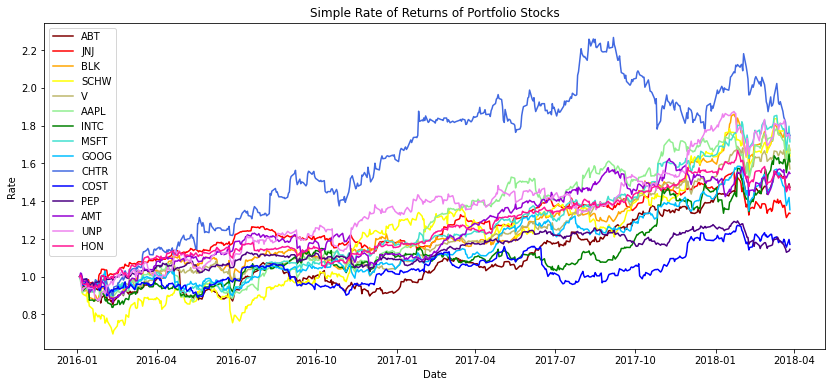

In [7]:
# visualising simple returns
plt.figure(figsize=(14,6))
for df, name, c in zip(portfolio, portfolio_ticker, color):
    plt.plot(df['Normalise Return'], label=name, color=c)
plt.title('Simple Rate of Returns of Portfolio Stocks')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()

In [8]:
# calculating log returns

portfolio_log_returns = pd.DataFrame()

for df in portfolio:
    portfolio_log_returns = pd.concat([portfolio_log_returns, np.log(df['Adj. Close']/df['Adj. Close'].shift(1))], axis=1)

portfolio_log_returns.columns = portfolio_ticker

portfolio_log_returns.head()

,ABT,JNJ,BLK,SCHW,V,AAPL,INTC,MSFT,GOOG,CHTR,COST,PEP,AMT,UNP,HON
2016-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05 00:00:00,-0.000233,0.004171,0.002578,-0.003132,0.007502,-0.025379,-0.004718,0.004552,0.000997,-0.013383,0.002442,0.006861,0.019559,-0.009671,0.008156
2016-01-06 00:00:00,-0.008423,-0.005067,-0.011444,-0.034789,-0.013198,-0.019764,-0.022419,-0.018332,0.001400,-0.004922,-0.009297,0.000302,-0.003556,-0.044179,-0.011379
2016-01-07 00:00:00,-0.024258,-0.011723,-0.044690,-0.053706,-0.019858,-0.043121,-0.038206,-0.035402,-0.023443,-0.003909,-0.023176,-0.019387,-0.025250,-0.023664,-0.029883
2016-01-08 00:00:00,-0.021166,-0.010741,-0.025502,-0.006188,-0.012409,0.005274,-0.010418,0.003062,-0.016546,0.007231,-0.017659,-0.003696,-0.016628,0.010617,-0.008095


In [9]:
# 2500 Monte Carlo simulations of different weights to achieve rate of return, volatility and sharpe ratio
portfolio_returns = []
portfolio_volatilities = []
portfolio_sharpe = []
portfolio_weights = []
risk_free_rate = 0.02

for x in range(25000):
    weights = np.random.random(len(portfolio))
    weights /= np.sum(weights)
    returns = np.sum(weights * portfolio_log_returns.mean()) * 250
    volatilities = np.sqrt(np.dot(weights.T, np.dot(portfolio_log_returns.cov() * 250, weights)))
    sharpe = (returns - risk_free_rate) / volatilities
    portfolio_returns.append(returns)
    portfolio_volatilities.append(volatilities)
    portfolio_sharpe.append(sharpe)
    portfolio_weights.append(weights)

portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)
portfolio_sharpe = np.array(portfolio_sharpe)
portfolio_weights = np.array(portfolio_weights)

In [10]:
# obtaining max sharpe ratio portfolio
max_sharpe_index = np.argmax(portfolio_sharpe)
max_sharpe_volatility = portfolio_volatilities[max_sharpe_index]
max_sharpe_return = portfolio_returns[max_sharpe_index]
max_sharpe_allocation = pd.DataFrame(portfolio_weights[max_sharpe_index], index=portfolio_log_returns.columns, columns=['Allocation %'])
max_sharpe_allocation['Allocation %'] = [round(x*100,2) for x in max_sharpe_allocation['Allocation %']]
max_sharpe_allocation = max_sharpe_allocation.T

print("Portfolio Allocation for Maximum Sharpe Ratio\n")
print("Expected Annual Return:", round(max_sharpe_return, 2))
print("Expected Annual Volatility:", round(max_sharpe_volatility, 2))
print("\n")
print(max_sharpe_allocation)

Portfolio Allocation for Maximum Sharpe Ratio

Expected Annual Return: 0.2
Expected Annual Volatility: 0.13


               ABT    JNJ   BLK  SCHW    V   AAPL  INTC  MSFT  GOOG  CHTR  \
Allocation %  3.47  11.48  2.55  2.96  7.3  13.04  0.73  13.5   1.6  5.66   

              COST  PEP    AMT    UNP   HON  
Allocation %  0.16  2.9  14.38  14.14  6.13  


In [11]:
# obtaining min volatility portfolio
min_vol_index = np.argmin(portfolio_volatilities)
min_vol_volatility = portfolio_volatilities[min_vol_index]
min_vol_return = portfolio_returns[min_vol_index]
min_vol_allocation = pd.DataFrame(portfolio_weights[min_vol_index], index=portfolio_log_returns.columns, columns=['Allocation %'])
min_vol_allocation['Allocation %'] = [round(x*100,2) for x in min_vol_allocation['Allocation %']]
min_vol_allocation = min_vol_allocation.T

print("Portfolio Allocation for Minimum Volatility\n")
print("Expected Annual Return:", round(min_vol_return, 2))
print("Expected Annual Volatility:", round(min_vol_volatility, 2))
print("\n")
print(min_vol_allocation)

Portfolio Allocation for Minimum Volatility

Expected Annual Return: 0.16
Expected Annual Volatility: 0.11


               ABT    JNJ   BLK  SCHW     V  AAPL  INTC  MSFT  GOOG  CHTR  \
Allocation %  1.32  15.44  3.11  2.06  1.11  0.66   1.0  5.43  3.93  6.36   

              COST    PEP   AMT    UNP    HON  
Allocation %  6.65  15.69  8.18  11.87  17.18  


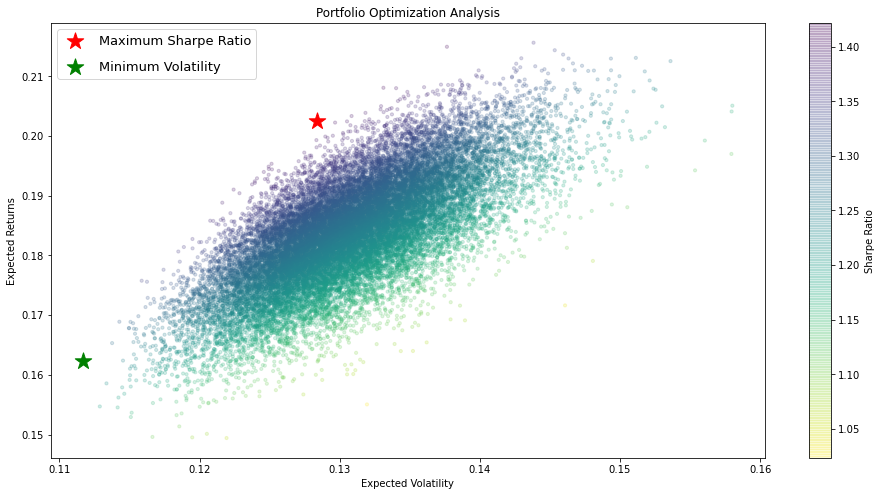

In [12]:
# visual plot of various portfolios
plt.figure(figsize=(16, 8))
plt.scatter(portfolio_volatilities, portfolio_returns, c=portfolio_sharpe, cmap='viridis_r', marker='o', s=10, alpha=0.2)
cb = plt.colorbar()
cb.set_label('Sharpe Ratio')
plt.scatter(max_sharpe_volatility, max_sharpe_return, marker='*', color='red', s=300, label='Maximum Sharpe Ratio')
plt.scatter(min_vol_volatility, min_vol_return, marker='*', color='green', s=300, label='Minimum Volatility')
plt.title('Portfolio Optimization Analysis')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')
plt.legend(fontsize=13, labelspacing=1)

The portfolio with the maximum Sharpe ratio maximises an investor's returns while minimising his risks.

We have calculated this portfolio to yield a 20% annual return and 13% annual volatility rate.

Thus, the recommended allocation of the portfolio is as follows:
<table>
    <tr>
        <th>Security</th>
        <th>Ticker Symbol</th>
        <th>Allocation %</th> 
    </tr>
        <tr>
        <td>Abbott Laboratories</td>
        <td>ABT</td>
        <td>1.15</td>
    </tr>
    <tr>
        <td>Johnson & Johnson</td>
        <td>JNJ</td>
        <td>12.67</td>
    </tr>
    <tr>
        <td>BlackRock, Inc.</td>
        <td>BLK</td>
        <td>4.1</td>
    </tr>
    <tr>
        <td>The Charles Schwab Corporation</td>
        <td>SCHW</td>
        <td>0.87</td>
    </tr>
    <tr>
        <td>Visa Inc.</td>
        <td>V</td>
        <td>2.39</td>
    </tr>
    <tr>
        <td>Apple Inc.</td>
        <td>AAPL</td>
        <td>3.7</td>
    </tr>
    <tr>
        <td>Intel Corporation</td>
        <td>INTC</td>
        <td>3.24</td>
    </tr>
    <tr>
        <td>Microsoft Corporation</td>
        <td>MSFT</td>
        <td>11.45</td>
    </tr>
    <tr>
        <td>Alphabet Inc.</td>
        <td>GOOG</td>
        <td>0.78</td>
    </tr>
    <tr>
        <td>Charter Communications, Inc.</td>
        <td>CHTR</td>
        <td>9.27</td>
    </tr>
    <tr>
        <td>Costco Wholesale Corporation</td>
        <td>COST</td>
        <td>4.49</td>
    </tr>
    <tr>
        <td>PepsiCo, Inc.</td>
        <td>PEP</td>
        <td>3.42</td>
    </tr>
        <tr>
        <td>American Tower Corporation (REIT)</td>
        <td>AMT</td>
        <td>15.04</td>
    </tr>
    <tr>
        <td>Union Pacific Corporation</td>
        <td>UNP</td>
        <td>17.08</td>
    </tr>
    <tr>
        <td>Honeywell International Inc.</td>
        <td>HON</td>
        <td>10.36</td>
    </tr>
</table>